# Задание 2


Умножение столбца на столбец осуществляется сразу на всех ядрах в одну итерацию. В идеальном случае задержки на связь отсутствуют, поэтому имеем:
$$
S_p = p \\
E_p = 1
$$

Этот же результат можно получить как частный случай оценки сложности умножения матрицы на вектор (см. [здесь](https://www.intuit.ru/studies/courses/1156/190/lecture/4952?page=2)).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df_all = pd.read_csv('results.csv', sep=';')
df_all.head()

,n,p,time
0,1000000,2,0.052243
1,5000000,2,0.293541
2,10000000,2,0.521792
3,50000000,2,2.440996
4,100000000,2,6.165948


In [15]:
df_all.p -= 1

In [16]:
#df_all.p = df_all.p.max() - df_all.p

## Ускорение и закон Амдаля

In [17]:
for n in df_all.n.unique():
    for p in df_all.p.unique():
        df_all.loc[(df_all.p==p)&(df_all.n==n),'mean_time'] = df_all[(df_all.p==p)&(df_all.n==n)]['time'].mean()

In [18]:
df = df_all
df

,n,p,time,mean_time
0,1000000,1,0.052243,0.054505
1,5000000,1,0.293541,0.296242
2,10000000,1,0.521792,0.518197
3,50000000,1,2.440996,2.688229
4,100000000,1,6.165948,5.514493
...,...,...,...,...
695,1000000,14,0.018203,0.017691
696,5000000,14,0.095559,0.085076
697,10000000,14,0.104568,0.165203
698,50000000,14,0.905558,0.894256


In [19]:
for n in df.n.unique():
    for p in df.p.unique():
        p_1_time = (df[(df.n==n)&(df.p==1)]['mean_time']).iloc[0]
        own_time = df[(df.p==p)&(df.n==n)]['mean_time'].iloc[0]
        df.loc[(df.p==p)&(df.n==n),'accel'] = p_1_time/own_time

In [20]:
df['eff'] = df['accel']/df['p']

## Аппроксимации ускорений

In [22]:
def amdal(p, f):
    return 1/(f + (1-f)/p)
def gustav(n, s):
    return n + (1-n)*s

In [23]:
def plot_save_graphs(x_label, y_label, fixed='p'):
    
    def _appr_accel(n, p):
        # TODO: place here theoretical approximation
        #return 6*n/(6*n/p + 6 + np.log2(p))
        return n/n*p
    
    def _appr_eff(n, p):
        return _appr_accel(n, p)/p
    
    def _appr_gustav(n, p, accels):
        '''
        if len(np.array(o).reshape(-1)) == 1:
            n = np.array([n]*len(accels))
        elif len(np.array(accels).reshape(-1)) == 1:
            accels = np.array([accels]*len(n))
        '''
        from scipy.optimize import curve_fit
        popt, pcov = curve_fit(gustav, n, accels)
        return gustav(n, popt[0]).iloc[-1]*n/n
    
    def _appr_amdal(n, p, accels):
        if len(np.array(p).reshape(-1)) == 1:
            p = np.array([p]*len(accels))
        elif len(np.array(accels).reshape(-1)) == 1:
            accels = np.array([accels]*len(p))
        from scipy.optimize import curve_fit
        popt, pcov = curve_fit(amdal, p, accels)
        return amdal(p, popt[0])
    
    def _routine(data, x_label, y_label, fixed_value):
        x_data, y_data = data[x_label], data[y_label]
        plt.scatter(x_data, y_data, label='real')
        p, n = (fixed_value, x_data)
        if x_label == 'p':
            p, n = (n, p)
        # Approximation
        if y_label == 'accel':
            plt.scatter(x_data, _appr_accel(n, p), color='red', label='theor')
            if x_label == 'p':
                plt.scatter(x_data, _appr_amdal(n, p, y_data), color='green', label='amdal')
            else:
                plt.scatter(x_data, _appr_gustav(n, p, y_data), color='grey', label='gustav')
        elif y_label == 'eff':
            plt.scatter(x_data, _appr_eff(n, p), color='red', label='theor')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend()
        plt.title(f'{y_label}, {fixed}={fixed_value}')
        plt.savefig(f'{y_label}_{fixed}_{fixed_value}', dpi=120)
        plt.show()
    if fixed == 'n':
        for n in df.n.unique():
            data = df[df.n==n]
            _routine(data, x_label, y_label, n)
    elif fixed == 'p':
        for p in df.p.unique():
            data = df[df.p==p]
            _routine(data, x_label, y_label, p)
    else:
        raise ValueError('Not implemented')

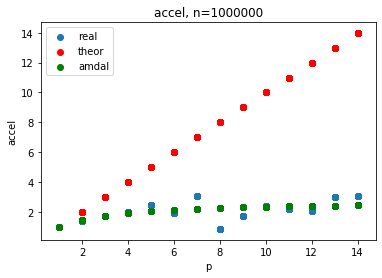

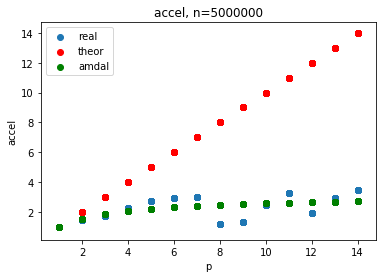

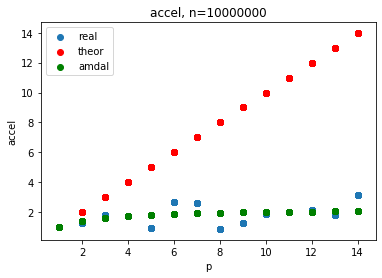

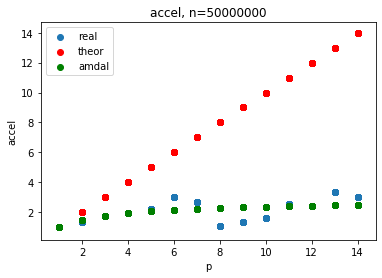

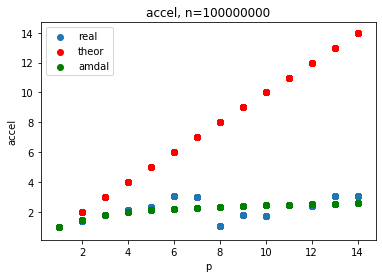

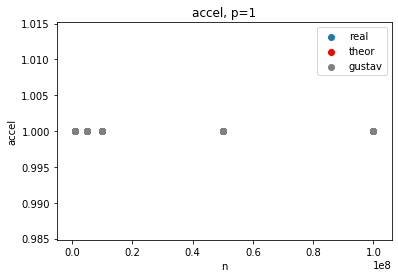

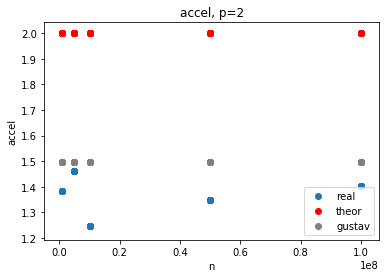

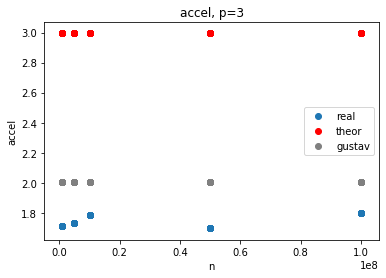

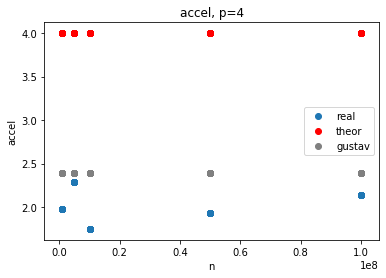

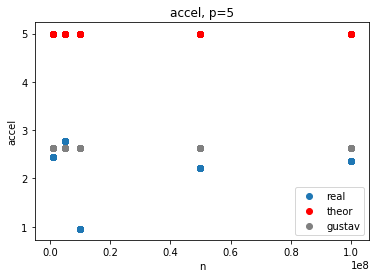

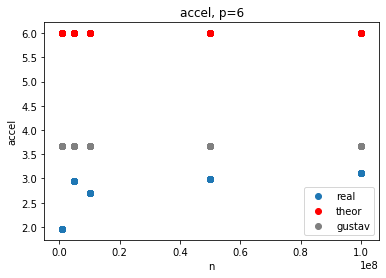

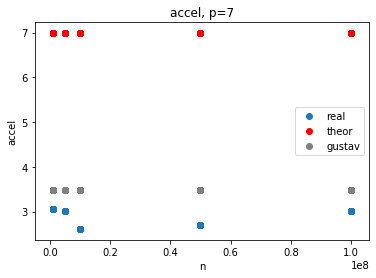

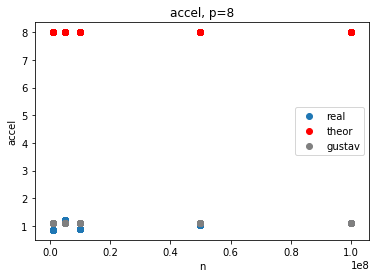

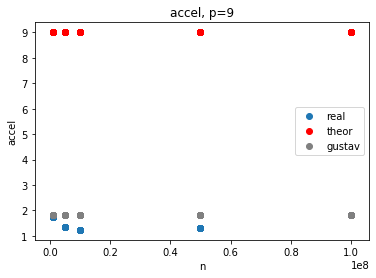

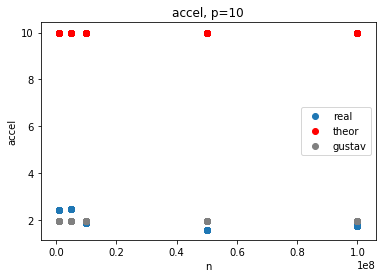

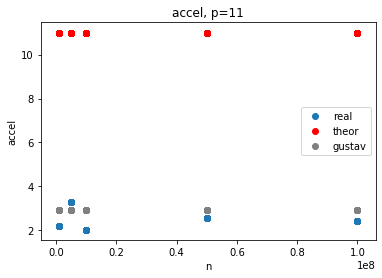

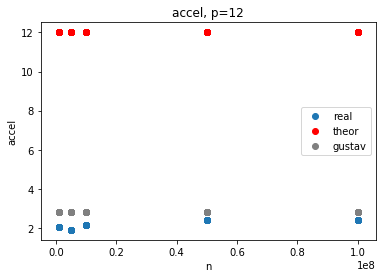

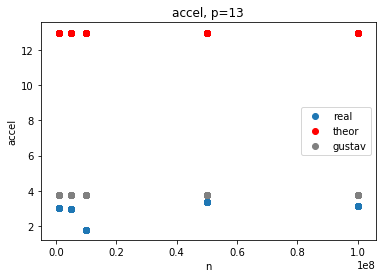

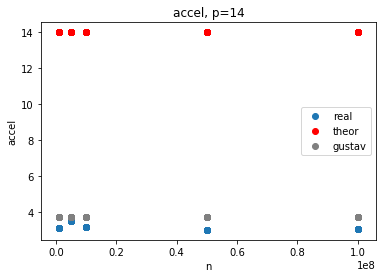

In [24]:
plot_save_graphs('p', 'accel', fixed='n')
plot_save_graphs('n', 'accel', fixed='p')
#plot_save_graphs('p', 'eff', fixed='n')
#plot_save_graphs('n', 'eff', fixed='p')